# 二维柱状图过滤器 - 实现第一个功能，并调试第一个错误
编写代码很重要。但是，要加入一个无人驾驶汽车团队，你的很大一部分工作是与现有的**大型**代码库打交道的。在诸如无人驾驶汽车之类的高风险工程项目中，你可能必须首先获得经理和同事的信任，然后才能让你对代码库进行重大更改。

对于团队的新进成员来说，典型的一个任务就是通过许多错误获得进步。所以考虑到这一点，这就是在该纳米学位项目中，你将为你的第一个项目所做的事情。

这个项目包括以下几个部分：

1. **探索代码** - 此时不要担心错误。我们的目标是熟悉这个代码库的组织方式，并弄清楚各部分分别是做什么的。
2. **实现一个功能** - 编写出能让机器人正确移动的代码。
3. **修正错误** - 执行动作时，一个以前没有出现过的错误就会显示出来。在这里，你需要确定这个错误是什么，并采取措施进行重现，然后找出原因并加以解决。


## 第1部分：探索代码
在这一部分，你只需运行一些现有代码，即可对定位器的概况有所熟悉。

你可以使用键盘上的箭头键浏览此 notebook 。你可以通过按下**`Ctrl + Enter`** 即可在单元格中运行代码。

浏览下面的单元格。在每个单元格，你应该：

1. 通读代码。如果这时你没有完全理解所有的代码，没关系。
2. 猜一猜运行代码时会发生什么。
3. 运行代码，并将你所看到的与你的预期进行比较。
4. 浏览到**TODO** 部分时，请仔细阅读说明，并完成相关任务。

In [21]:
# This code "imports" code from some of the other files we've written
# in this directory. Specifically simulate.py and helpers.py
from __future__ import division, print_function
import simulate as sim
import helpers
import localizer
import importlib

# Don't worry too much about this code for now...

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


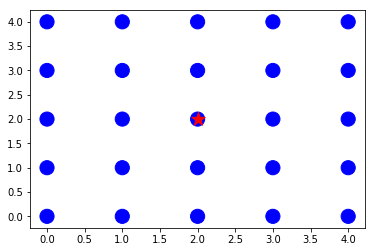

In [23]:
# This code defines a 5x5 robot world as well as some other parameters
# which we will discuss later. It then creates a simulation and shows 
# the initial beliefs. 
R = 'r'
G = 'g'
grid = [
    [R,G,G,G,R],
    [G,G,R,G,R],
    [G,R,G,G,G],
    [R,R,G,R,G],
    [R,G,R,G,R],
]
blur = 0.05
p_hit = 200.0
simulation = sim.Simulation(grid, blur, p_hit)
simulation.show_beliefs()

重复按下Ctrl + Enter，多次运行该代码。

每次运行后，观察状态是如何改变的。

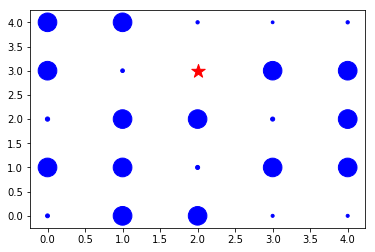

In [24]:
simulation.run(1)
simulation.show_beliefs()

你认为调用`run` 是用来做什么的？看一看**`simulate.py`**中的代码，并找出答案。

花几分钟看一看`run`方法及其调用的方法，熟悉一下具体是如何工作的。

#### 我在看什么？

红色星星表示机器人的真实位置。蓝色圆圈表示机器人认为它处于任何一个特定位置的信念强度。

理想情况下，我们希望最大的蓝色圆圈与红色星星处于相同的位置。

In [25]:
# We will provide you with the function below to help you look
# at the raw numbers.

def show_rounded_beliefs(beliefs):
    for row in beliefs:
        for belief in row:
            print("{:0.3f}".format(belief), end="  ")
        print()
        
# The {:0.3f} notation is an example of "string 
# formatting" in Python. You can learn more about string 
# formatting at https://pyformat.info/

In [19]:
show_rounded_beliefs(simulation.beliefs)

0.003  0.008  0.300  0.003  0.001  
0.000  0.007  0.003  0.002  0.000  
0.003  0.003  0.002  0.010  0.001  
0.005  0.309  0.007  0.000  0.003  
0.305  0.013  0.004  0.003  0.005  


_____

## 第2部分：实现2D感测函数
正如你所看到的，机器人的判断并没有改变。无论我们调用多少次这个模拟的感测方法，机器人的判断都没有发生变化，它的判断是一致的。

### 说明
1. 打开`localizer.py`并完成`sense`函数。
2. 运行下面单元格中的代码，导入定位器模块（或重新加载它），然后测试你的感测函数。
3. 如果测试通过，表明你已经成功实现了第一个功能！继续进行这个项目吧。如果测试没有通过（可能不会出现在测试的前几次），继续修改你的`sense`函数，直到通过测试！

In [26]:
importlib.reload(localizer)
def test_sense():
    R = 'r'
    _ = 'g'

    simple_grid = [
        [_,_,_],
        [_,R,_],
        [_,_,_]
    ]

    p = 1.0 / 9
    initial_beliefs = [
        [p,p,p],
        [p,p,p],
        [p,p,p]
    ]

    observation = R

    expected_beliefs_after = [
        [1/11, 1/11, 1/11],
        [1/11, 3/11, 1/11],
        [1/11, 1/11, 1/11]
    ]

    p_hit  = 3.0
    p_miss = 1.0
    beliefs_after_sensing = localizer.sense(
        observation, simple_grid, initial_beliefs, p_hit, p_miss)

    if helpers.close_enough(beliefs_after_sensing, expected_beliefs_after):
        print("Tests pass! Your sense function is working as expected")
        return
    
    elif not isinstance(beliefs_after_sensing, list):
        print("Your sense function doesn't return a list!")
        return
        
    elif len(beliefs_after_sensing) != len(expected_beliefs_after):
        print("Dimensionality error! Incorrect height")
        return
              
    elif len(beliefs_after_sensing[0] ) != len(expected_beliefs_after[0]):
        print("Dimensionality Error! Incorrect width")
        return
    
    elif beliefs_after_sensing == initial_beliefs:
        print("Your code returns the initial beliefs.")
        return
        
    total_probability = 0.0
    for row in beliefs_after_sensing:
        for p in row:
            total_probability += p
    if abs(total_probability-1.0) > 0.001:
        
        print("Your beliefs appear to not be normalized")
        return
    
    print("Something isn't quite right with your sense function")

test_sense()

Tests pass! Your sense function is working as expected


## 集成测试
在我们称之为“完整”之前，应该执行一次**集成测试**。虽然我们已经验证了感测函数可以独立使用，但这个定位器是否可以正常工作呢？

我们来执行一个集成测试。首先，在下面的单元格中执行代码用于准备仿真环境。

In [266]:
from simulate import Simulation
import simulate as sim
import helpers
import importlib
importlib.reload(localizer)
importlib.reload(sim)
importlib.reload(helpers)

R = 'r'
G = 'g'
grid = [
    [R,G,G,G,R,R,R],
    [G,G,R,G,R,G,R],
    [G,R,G,G,G,G,R],
    [R,R,G,R,G,G,G],
    [R,G,R,G,R,R,R],
    [G,R,R,R,G,R,G],
    [R,R,R,G,R,G,G],
]

# Use small value for blur. This parameter is used to represent
# the uncertainty in MOTION, not in sensing. We want this test
# to focus on sensing functionality
blur = 0.1
p_hit = 100.0
simulation = sim.Simulation(grid, blur, p_hit)

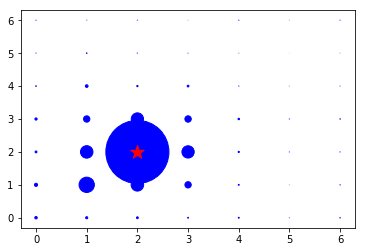

In [308]:
# Use control+Enter to run this cell many times and observe how 
# the robot's belief that it is in each cell (represented by the
# size of the corresponding circle) changes as the robot moves.
# The true position of the robot is given by the red star.

# Run this cell about 15-25 times and observe the results
simulation.run(1)
simulation.show_beliefs()

# If everything is working correctly you should see the beliefs
# converge to a single large circle at the same position as the 
# red star.
#
# When you are satisfied that everything is working, continue
# to the next section

## 第3部分：识别并重现错误
软件出现了错误，没关系。

你的机器人用户会把这种错误称为技术支持与投诉，比如：

> “我在一个方形的房间里使用你的机器人时，一切都很好，然后我试着在一个矩形房间里加载了一个地图，之后机器人行驶了几秒钟，突然就停止工作了。请修复一下吧！“

现在，必须要进行调试。我们将采用系统化的方法试一试。

1. 重现这个错误。
2. 阅读（并理解）错误消息（当存在时）。
3. 编写一个触发这个错误的测试。
4. 生成一个错误成因的假设。
5. 尝试解决它。如果修复了这个错误，太棒了！如果没有修复，请返回步骤4。

### 第1步：重现错误
根据用户的描述，**矩形环境**似乎是造成这个错误的原因。

下面的代码与你在对新功能进行集成测试时使用的代码相同。看一看是否可以通过修改它来重现错误。

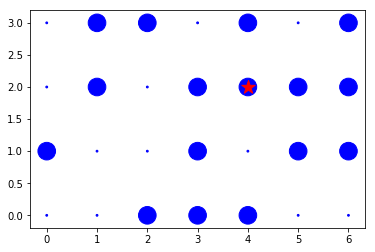

In [309]:
from simulate import Simulation
import simulate as sim
import helpers
import importlib
importlib.reload(localizer)
importlib.reload(sim)
importlib.reload(helpers)

R = 'r'
G = 'g'

grid = [ 
    [R,G,G,G,R,R,R],
    [G,G,R,G,R,G,R],
    [G,R,G,G,G,G,R],
    [R,R,G,R,G,G,G],
]

blur = 0.001
p_hit = 100.0
simulation = sim.Simulation(grid, blur, p_hit)

# remember, the user said that the robot would sometimes drive around for a bit...
# It may take several calls to "simulation.run" to actually trigger the bug.
simulation.run(1)
simulation.show_beliefs()


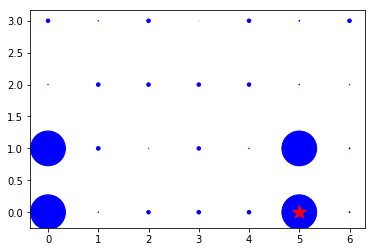

In [311]:
simulation.run(1)
simulation.show_beliefs()

### 第2步：阅读并理解错误消息
如果你触发了这个错误，就应该在这个单元格的正上方看到一条错误消息。该消息的结尾应该是这样的：

In [12]:
IndexError: list index out of range

SyntaxError: invalid syntax (<ipython-input-12-da52f0dbfccb>, line 1)

而在这条消息的正上面，你应该看到了类似这样的代码：

In [ ]:
path/to/your/directory/localizer.pyc in move(dy, dx, beliefs, blurring)
     38             new_i = (i + dy ) % width
     39             new_j = (j + dx ) % height
---> 40             new_G[int(new_i)][int(new_j)] = cell
     41     return blur(new_G, blurring)

这些代码表示，移动函数中的第40行导致出现了`IndexError`，因为“列表索引超出范围”。

如果你不确定这表示什么含义，请使用Google！

把`IndexError: list index out of range`复制粘贴在Google的搜索框！当我这样做时，我看到了下面的搜索结果：

![Search Results](http://i.imgur.com/gleBmBy.png)

浏览最上面的几个链接（通常这些都来自堆栈溢出），并阅读人们对这种错误的评论，直到你找到满意答案，了解该错误是如何产生的。

### 第3步：编写一个重现错误的测试
这样做可以帮助你了解何时修复它，并确保未来不会再出现这种错误。 你可能需要尝试许多潜在的解决方案，所以最好的情况是，只需调用一个函数即可确认该错误是否已修复。

In [313]:
# According to the user, sometimes the robot actually does run "for a while" 
# - How can you change the code so the robot runs "for a while"?
# - How many times do you need to call simulation.run() to consistently
#   reproduce the bug?
# Modify the code below so that when the function is called 
# it consistently reproduces the bug.
def test_robot_works_in_rectangle_world():
    from simulate import Simulation
    import simulate as sim
    import helpers
    import importlib
    importlib.reload(localizer)
    importlib.reload(sim)
    importlib.reload(helpers)

    R = 'r'
    G = 'g'

    grid = [ 
        [R,G,G,G,R,R,R],
        [G,G,R,G,R,G,R],
        [G,R,G,G,G,G,R],
        [R,R,G,R,G,G,G],
    ]

    blur = 0.001
    p_hit = 100.0
    for i in range(1000):
        simulation = sim.Simulation(grid, blur, p_hit)
        simulation.run(1)
    
test_robot_works_in_rectangle_world()

### 第4步：生成一个假设
为了猜测错误出现的原因，使用一些Python调试工具会很有帮助。

 `pdb`模块（`p`ython `d`e`b`ugger）在这里会很有帮助！

#### 设置调试器 
1. 打开`localizer.py`并取消import pdb`的顶部的行的批注。
2. 在导致出现错误`new_G[int(new_i)][int(new_j)] = cell`的代码行之前，添加一行新的代码`pdb.set_trace()` 。
3. 通过调用你的测试函数运行这个测试（运行下面的单元格）。
4. 你应该看到弹出了一个文本输入框！现在，在这个输入框中键入`c`并按回车键**继**续程序的执行。继续输入`c`并按回车键，直到再次触发这个错误。

In [314]:
test_robot_works_in_rectangle_world()

#### 使用调试器
调试器通过在代码中编写`pdb.set_trace()`的任何地方暂停程序执行来正常工作。你也可以访问你的代码中可以访问的任意变量。

尝试再次运行你的测试。这一次，当文本输入框出现时，输入`new_i`并按回车键。你会在调试器窗口中看到`new_i`变量的值。多运行几次调试器：找到`new_j` 、`height` 与`new_i`的值。它们看起来是否合理或正确？

之后，输入`c` ，继续执行程序。是否再次触发了那个错误？继续尝试，直到猜测到导致出现错误的原因。

### 第5步：编写一个修复程序
你有一个关于出现这个错误的假设。现在尝试修复它。完成后，再次调用你的测试函数。你可能希望删除（或标注出）添加到`localizer.py`中的行，即`pdb.set_trace()`。这样你的测试就可以运行了，而无需在调试器框中键入`c`。

In [315]:
test_robot_works_in_rectangle_world()

## 恭喜你！
恭喜你！你已经实现了你的第一个功能，并成功调试了机器人在矩形环境中遇到的错误。